1. Познакомьтесь с данными.
2. Осуществите предобработку данных.
    - 2.1 Приведите заголовки к удобному виду.
    - 2.2 Проверьте типы данных.
    - 2.3 Обработайте пропуски.
    - 2.4 Проверьте наличие дубликатов.
    - 2.5 Исключите нулевые значения в выручке для дальнейшего исследования. 
3. Исследовательский анализ данных:
     - 3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.
     - 3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.
     - 3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.
     - 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.
     - 3 .5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета:
     https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
     - 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

Каждый пункт исследования сопроводите выводами.


In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st

## Задание 1

In [2]:
df = pd.read_csv('air_data.csv', sep=';')
df.head()

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE


## Задание 2

### 2.1

In [3]:
#Заменим неподходящие названия столбцов 
df.columns = ('Issue_date', 'Flight_date_loc', 'Pax_type', 'Revenue_amount', 'Orig_city_code', 'Dest_city_code', 'Route_flight_type', 'FFP_flag', 'Sale_type')
df

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11 00:00:00,2022-06-22 00:00:00,CHD,480,MOW,OMS,ВВЛ,NaN,ONLINE
49996,2022-06-06 00:00:00,2022-06-20 00:00:00,AD,270,LED,MOW,ВВЛ,NaN,OFFLINE
49997,2022-06-26 00:00:00,2022-06-29 00:00:00,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49998,2022-06-26 00:00:00,2022-06-28 00:00:00,AD,270,KZN,MOW,ВВЛ,NaN,OFFLINE


### 2.2

In [4]:
# Проверим информацию о данных. Заметно, что в столбцах "Issue_date" и "Flight_date_loc" другой тип данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Issue_date         50000 non-null  object
 1   Flight_date_loc    50000 non-null  object
 2   Pax_type           50000 non-null  object
 3   Revenue_amount     50000 non-null  int64 
 4   Orig_city_code     49998 non-null  object
 5   Dest_city_code     49999 non-null  object
 6   Route_flight_type  50000 non-null  object
 7   FFP_flag           19398 non-null  object
 8   Sale_type          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


In [5]:
#Меняем тип данных 
df['Issue_date'] = pd.to_datetime(df['Issue_date'])
df['Flight_date_loc'] = pd.to_datetime(df['Flight_date_loc'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Issue_date         50000 non-null  datetime64[ns]
 1   Flight_date_loc    50000 non-null  datetime64[ns]
 2   Pax_type           50000 non-null  object        
 3   Revenue_amount     50000 non-null  int64         
 4   Orig_city_code     49998 non-null  object        
 5   Dest_city_code     49999 non-null  object        
 6   Route_flight_type  50000 non-null  object        
 7   FFP_flag           19398 non-null  object        
 8   Sale_type          50000 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.4+ MB


### 2.3

In [6]:
#Изучим пропущенные значения
df.isna().sum()

Issue_date               0
Flight_date_loc          0
Pax_type                 0
Revenue_amount           0
Orig_city_code           2
Dest_city_code           1
Route_flight_type        0
FFP_flag             30602
Sale_type                0
dtype: int64

In [7]:
#Очень много пропущенных значений в столбце 'FFP_flag'
df[df['FFP_flag'].isna()]
df['FFP_flag'] = df['FFP_flag'].fillna('NO FFP')
df

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NO FFP,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NO FFP,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NO FFP,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,NO FFP,ONLINE
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,NO FFP,OFFLINE
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,NO FFP,OFFLINE


In [8]:
#Посмотрим на пропущенные значения в столбце 'Orig_city_code'
df[df['Orig_city_code'].isna()]

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type
2020,2022-02-17,2022-03-22,AD,440,NaN,KHV,МВЛ,NO FFP,ONLINE
8100,2022-05-02,2022-05-11,AD,440,NaN,KHV,МВЛ,NO FFP,OFFLINE


In [9]:
#Посмотрим на пропущенные значения в столбце 'Dest_city_code'
df[df['Dest_city_code'].isna()]

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type
47582,2022-05-13,2022-07-28,AD,440,KHV,NaN,МВЛ,NO FFP,OFFLINE


Так как сложно точно определить, какие значения должны стоять в столбцах "Orig_city_code" и "Dest_city_code", было решено удалить строки с пропущенными значениями из датасета.

In [10]:
df = df.dropna(subset = ['Orig_city_code'])
df = df.dropna(subset = ['Dest_city_code'])
df.shape

(49997, 9)

### 2.4

In [11]:
#Посмотрим, сколько дубликатов, - 169
df.duplicated().sum()

169

In [12]:
#Удалим дубликаты
df = df.drop_duplicates().reset_index(drop=True)

### 2.5

In [13]:
#Выведем строки, где выручка является нулевым значением
df[df['Revenue_amount'] == 0]

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type
13,2021-12-05,2022-01-16,INF,0,PEZ,MOW,ВВЛ,NO FFP,OFFLINE
32,2021-12-08,2022-01-11,INF,0,UFA,MOW,ВВЛ,NO FFP,ONLINE
106,2021-12-05,2022-01-08,INF,0,MOW,UFA,ВВЛ,NO FFP,ONLINE
228,2021-12-04,2022-01-07,INF,0,MOW,AER,ВВЛ,NO FFP,ONLINE
288,2021-10-26,2021-11-02,INF,0,MOW,PEZ,ВВЛ,NO FFP,ONLINE
...,...,...,...,...,...,...,...,...,...
49213,2022-04-09,2022-05-01,INF,0,OVB,AER,ВВЛ,NO FFP,ONLINE
49248,2022-04-01,2022-05-17,INF,0,MOW,KZN,ВВЛ,NO FFP,ONLINE
49312,2021-12-16,2021-12-16,AD,0,OVB,MOW,ВВЛ,NO FFP,OFFLINE
49519,2022-04-15,2022-05-15,INF,0,NYM,MOW,ВВЛ,NO FFP,OFFLINE


In [14]:
#Перезаписываем датасет
df = df[df['Revenue_amount'] != 0].reset_index(drop=True)
df

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NO FFP,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NO FFP,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NO FFP,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49357,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,NO FFP,ONLINE
49358,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,NO FFP,OFFLINE
49359,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49360,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,NO FFP,OFFLINE


### Вывод: 

В ходе предобработки были изменены заголовки, тип данных в столбцах 'Issue_date' и 'Flight_date_loc'. Также были обнаружены пропущенные значения: наибольшее значение составляет 30602 в столбце 'FFP_flag', что является значительной частью датасета, поэтому было принято решение заполнить их значением 'No FFP'; несколько пропущенных значений замечены в стлолбцах 'Orig_city_code' и 'Dest_city_code', но трудно определить нужные значения вместо пропусков, поэтому они были удалены. Что касается дубликатов, то их количество составило 169, и они были также удалены. Последний этап - удаление строк, где представлена нулевая выручка.

## Задание 3

### 3.1

In [15]:
#Посмотрим на динамику продаж по дате покупки 
date_and_revenue= df.groupby('Issue_date')['Revenue_amount'].sum().reset_index()
date_and_revenue

,Issue_date,Revenue_amount
0,2021-10-01,60310
1,2021-10-02,33100
2,2021-10-03,34320
3,2021-10-04,58190
4,2021-10-05,60800
...,...,...
360,2022-09-26,39520
361,2022-09-27,48350
362,2022-09-28,44860
363,2022-09-29,27460


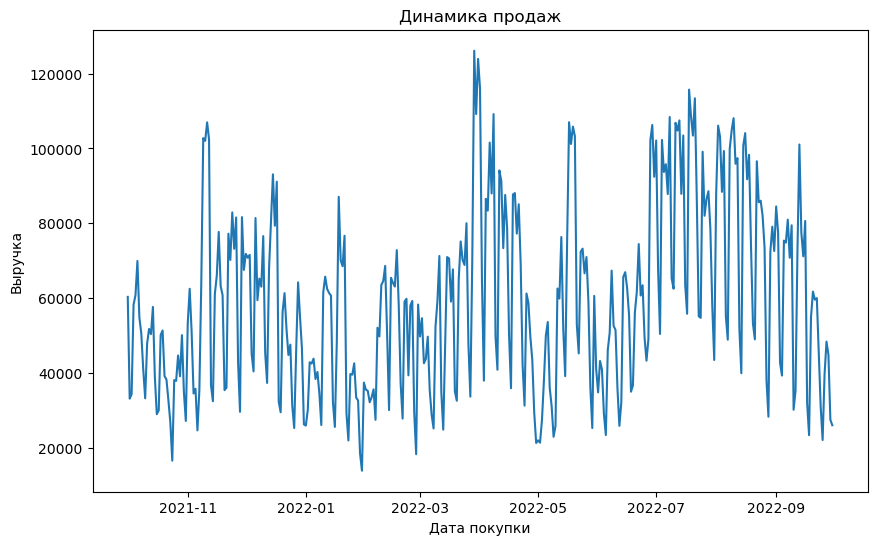

In [16]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.lineplot(data=df, x='Issue_date', y='Revenue_amount', ci=None, estimator='sum').set(title='Динамика продаж', xlabel='Дата покупки', ylabel='Выручка')
plt.show()

Можно заметить разные колебания выручки от даты к дате, поэтому нельзя сказать о каких-либо определенных выводах

In [17]:
#Построим таблицу динамики выручки со столбцами для детализации
data = df.pivot_table(index=['Issue_date', 'FFP_flag', 'Route_flight_type', 'Sale_type'], values='Revenue_amount', aggfunc='sum')
data

Revenue_amount
Issue_date FFP_flag Route_flight_type Sale_type                
2021-10-01 FFP      ВВЛ               OFFLINE              7300
                                      ONLINE              11420
                    МВЛ               OFFLINE               550
                                      ONLINE               2880
           NO FFP   ВВЛ               OFFLINE             16480
...                                                         ...
2022-09-30 FFP      МВЛ               ONLINE                150
           NO FFP   ВВЛ               OFFLINE             13990
                                      ONLINE               2500
                    МВЛ               OFFLINE              4170
                                      ONLINE               2680

[2380 rows x 1 columns]

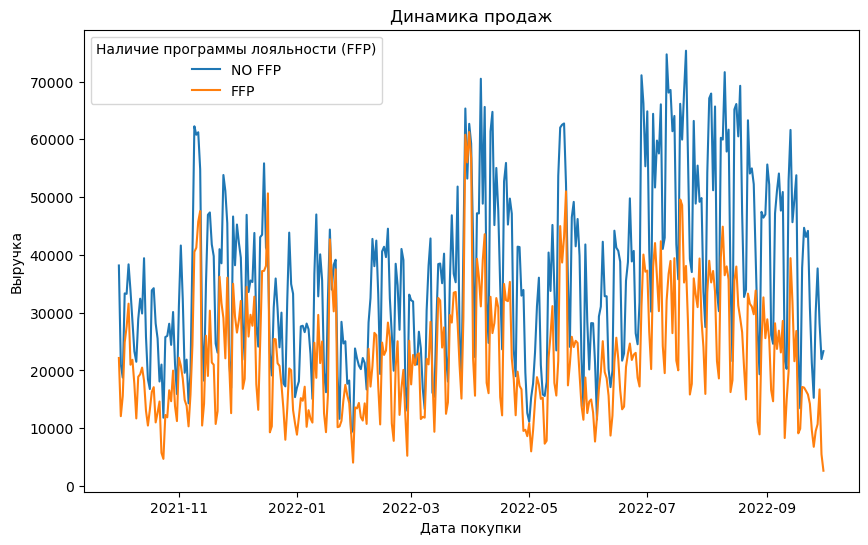

In [18]:
#Детализация по полю "FFP_flag"
sns.lineplot(data=df, x='Issue_date', y='Revenue_amount', ci=None, hue='FFP_flag', estimator='sum').set(title='Динамика продаж', xlabel='Дата покупки', ylabel='Выручка')
plt.legend(title='Наличие программы лояльности (FFP)')
plt.show()

Можно увидеть, что люди, у которых есть программа лояльности, приносят меньше выручки, чем те, у кого ее нет.

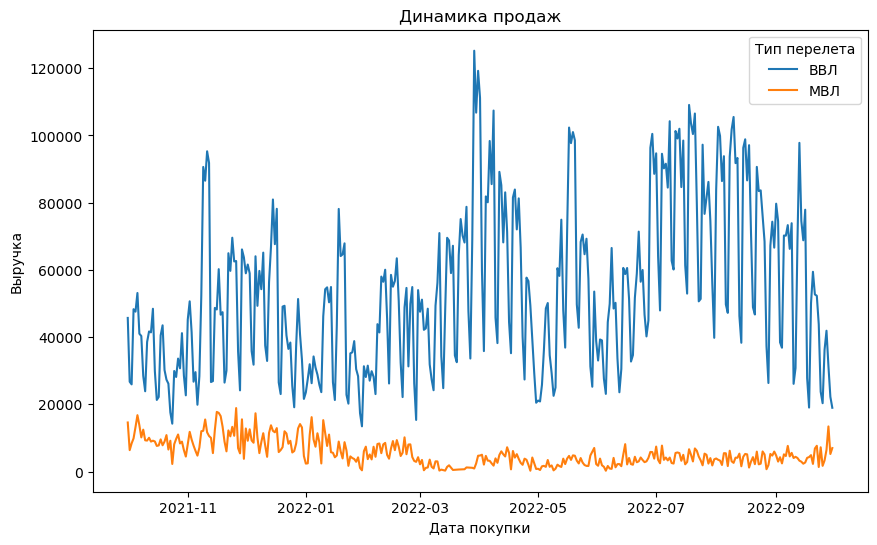

In [19]:
#Детализация по полю 'Route_flight_type'
sns.lineplot(data=df, x='Issue_date', y='Revenue_amount', ci=None, hue='Route_flight_type', estimator='sum').set(title='Динамика продаж', xlabel='Дата покупки', ylabel='Выручка')
plt.legend(title='Тип перелета')
plt.show()

Люди, которые используют внутренние воздушные линии (ВВЛ), приносят больше прибыли, чем люди, которые пользуются международными воздушными линиями (МВЛ), причем колебания выручки по МВЛ менее сильные, чем по ВВЛ.

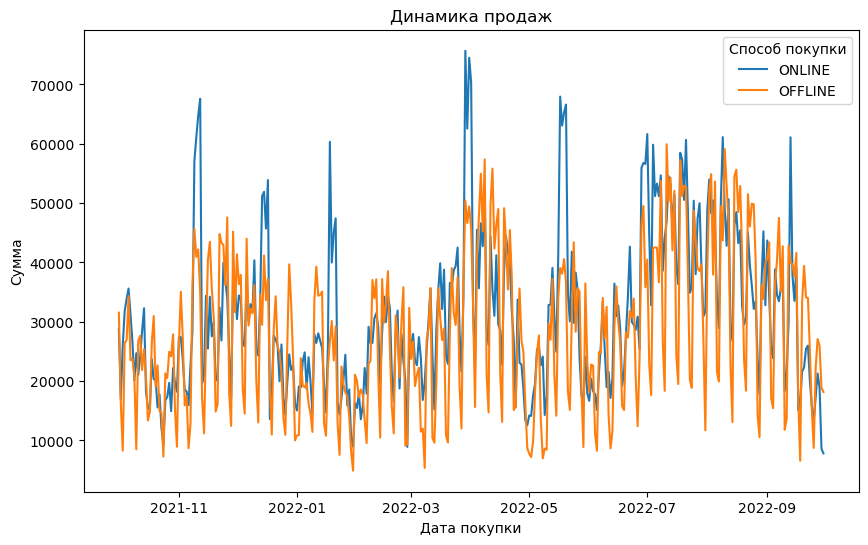

In [20]:
#Детализация по полю 'Sale_type' 
sns.lineplot(data=df, x='Issue_date', y='Revenue_amount', ci=None, hue='Sale_type', estimator='sum').set(title='Динамика продаж', xlabel='Дата покупки', ylabel='Сумма')
plt.legend(title='Способ покупки')
plt.show()

По способам покупки динамика суммы выручки примерно одинаковая, кроме несколько пиковых значений по Online способу покупки.

In [21]:
#Создаем таблицу по типам пассажиров
df_1 = df.replace({'Pax_type': {'AD': 'ADULT', 'CHD': 'CHILD', 'INF': 'UNDEFINED'}})
pax_type = pd.pivot_table(data=df_1, index='Pax_type', values='Revenue_amount', aggfunc=['sum', 'count']).reset_index()
pax_type.columns = ('Pax_type', 'Revenue_sum', 'Revenue_count')
pax_type

,Pax_type,Revenue_sum,Revenue_count
0,ADULT,20259210,45831
1,CHILD,1333430,3445
2,UNDEFINED,9730,86


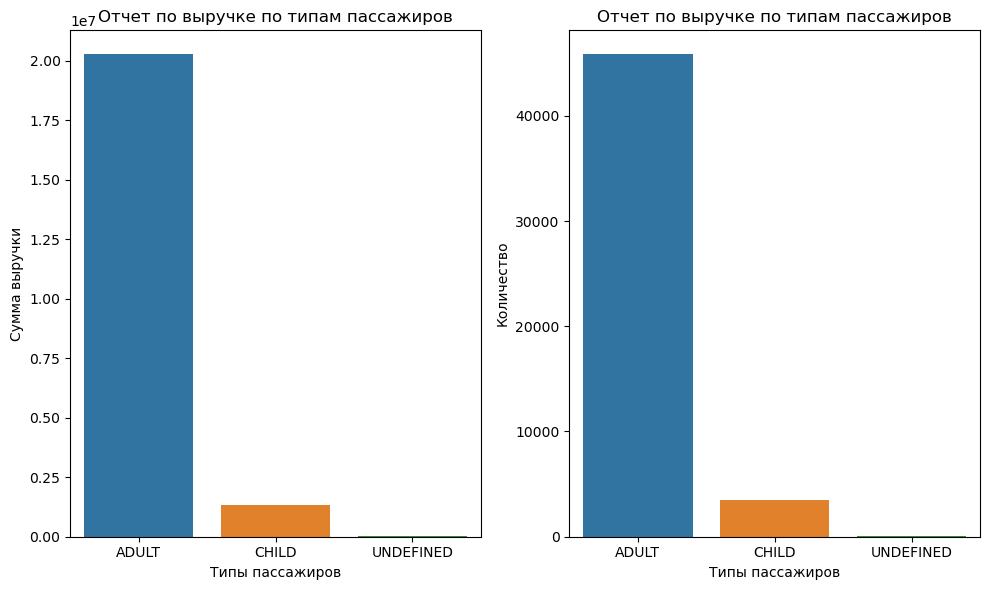

In [22]:
fid,ax = plt.subplots(1,2)
sns.barplot(data=pax_type, x='Pax_type', y='Revenue_sum', ci=None, ax=ax[0]).set(title='Отчет по выручке по типам пассажиров', xlabel='Типы пассажиров', ylabel='Сумма выручки')
sns.barplot(data=pax_type, x='Pax_type', y='Revenue_count', ci=None, ax=ax[1]).set(title='Отчет по выручке по типам пассажиров', xlabel='Типы пассажиров', ylabel='Количество')
plt.tight_layout()
plt.show()

По сумме выручки в целом большую доходность приносят взрослые. По количеству снова на первом месте взрослые, их более 40 тысяч. Самые последние места в обоих случаях занимает Undefined, а дети представляют собой маленькую часть, причем ближе к последнему, чем ко взрослым.

In [23]:
#Создаем таблицу по типам перелетов
route_flight_type = pd.pivot_table(data=df, index='Route_flight_type', values='Revenue_amount', aggfunc=['sum', 'count']).reset_index()
route_flight_type.columns = ('Route_flight_type', 'Revenue_sum', 'Revenue_count')
route_flight_type

,Route_flight_type,Revenue_sum,Revenue_count
0,ВВЛ,19610480,45468
1,МВЛ,1991890,3894


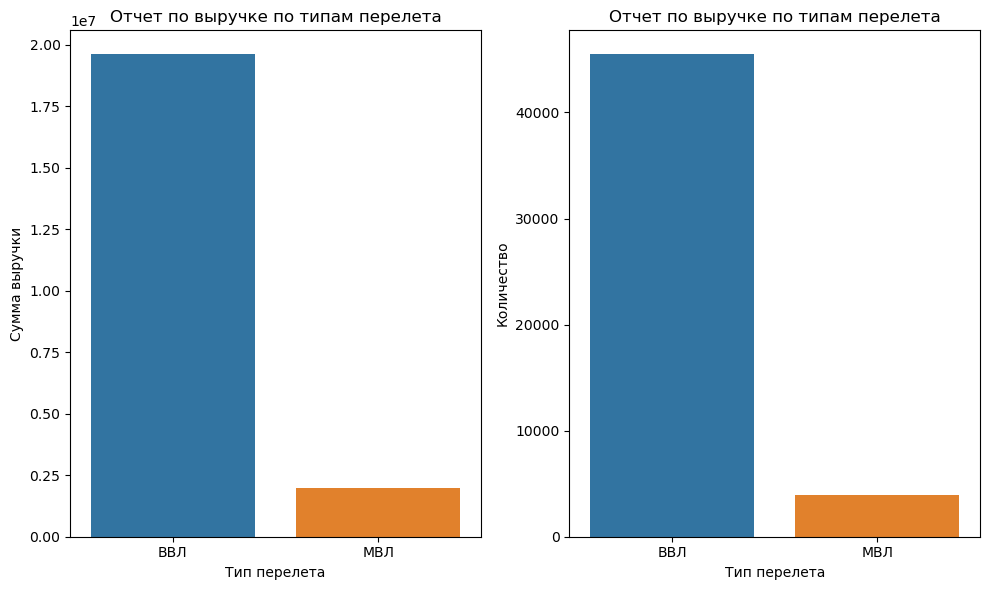

In [24]:
fid,ax = plt.subplots(1,2)
sns.barplot(data=route_flight_type, x='Route_flight_type', y='Revenue_sum', ci=None, ax=ax[0]).set(title='Отчет по выручке по типам перелета', xlabel='Тип перелета', ylabel='Сумма выручки')
sns.barplot(data=route_flight_type, x='Route_flight_type', y='Revenue_count', ci=None, ax=ax[1]).set(title='Отчет по выручке по типам перелета', xlabel='Тип перелета', ylabel='Количество')
plt.tight_layout()
plt.show()

Как и по сумме выручки, так и по количеству наибольшее значение принимает ВВЛ.

In [25]:
#Создаем таблицу по способам покупки
sale_type = pd.pivot_table(data=df, index='Sale_type', values='Revenue_amount', aggfunc=['sum', 'count']).reset_index()
sale_type.columns = ('Sale_type', 'Revenue_sum', 'Revenue_count')
sale_type

,Sale_type,Revenue_sum,Revenue_count
0,OFFLINE,10316900,21625
1,ONLINE,11285470,27737


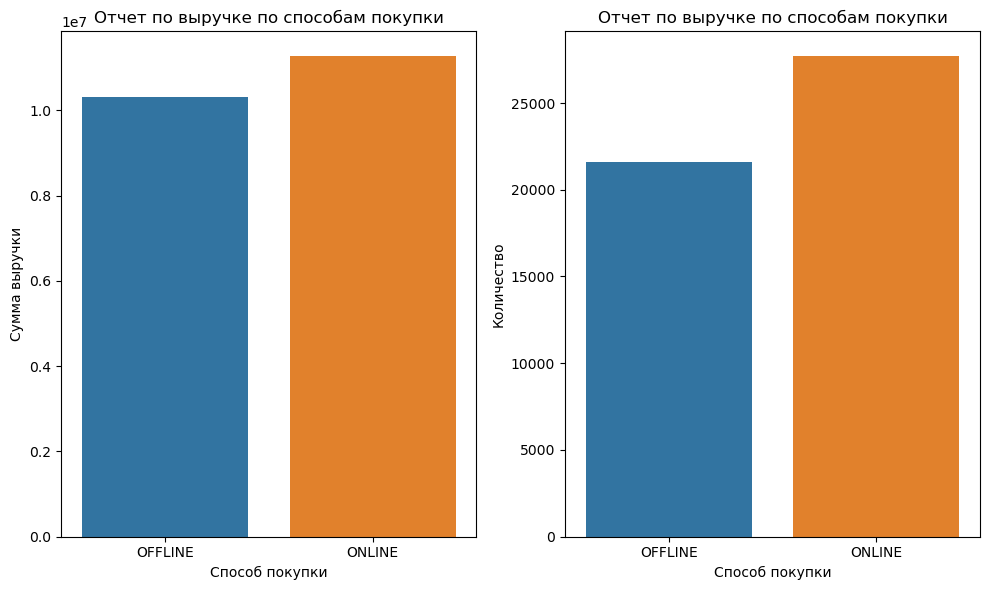

In [26]:
fid,ax = plt.subplots(1,2)
sns.barplot(data=sale_type, x='Sale_type', y='Revenue_sum', ci=None, ax=ax[0]).set(title='Отчет по выручке по способам покупки', xlabel='Способ покупки', ylabel='Сумма выручки')
sns.barplot(data=sale_type, x='Sale_type', y='Revenue_count', ci=None, ax=ax[1]).set(title='Отчет по выручке по способам покупки', xlabel='Способ покупки', ylabel='Количество')
plt.tight_layout()
plt.show()

ONLINE способ пользуется большей популярностью и приносит больше выручки, чем OFFLINE.

In [27]:
#Создаем таблицу по наличии программы лояльности
ffp_flag = pd.pivot_table(data=df, index='FFP_flag', values='Revenue_amount', aggfunc=['sum', 'count']).reset_index()
ffp_flag.columns = ('FFP_flag', 'Revenue_sum', 'Revenue_count')
ffp_flag

,FFP_flag,Revenue_sum,Revenue_count
0,FFP,8222390,19336
1,NO FFP,13379980,30026


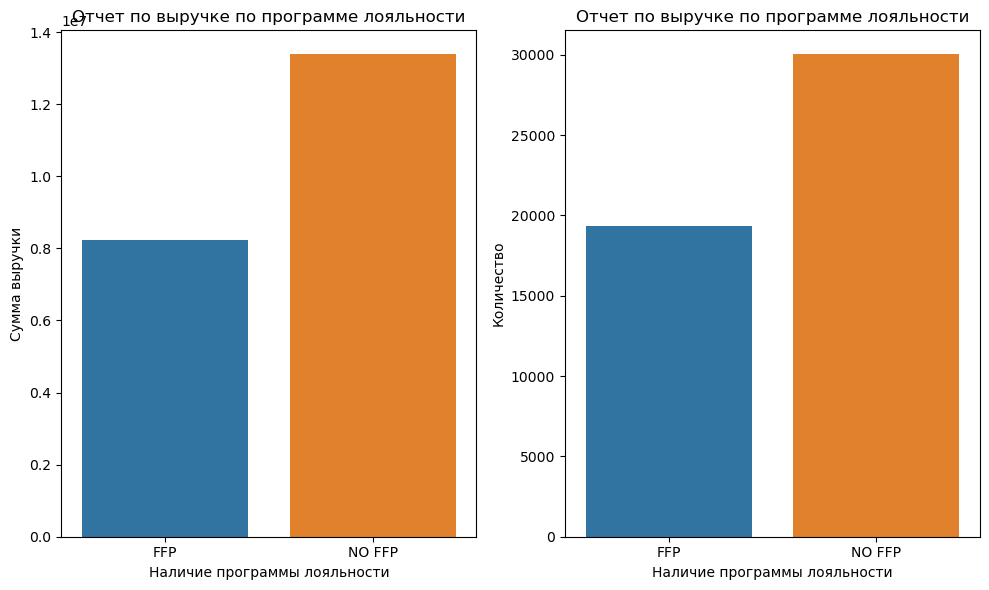

In [28]:
fid,ax = plt.subplots(1,2)
sns.barplot(data=ffp_flag, x='FFP_flag', y='Revenue_sum', ci=None, ax=ax[0]).set(title='Отчет по выручке по программе лояльности', xlabel='Наличие программы лояльности', ylabel='Сумма выручки')
sns.barplot(data=ffp_flag, x='FFP_flag', y='Revenue_count', ci=None, ax=ax[1]).set(title='Отчет по выручке по программе лояльности', xlabel='Наличие программы лояльности', ylabel='Количество')
plt.tight_layout()
plt.show()

Наличие программы лояльности приносит меньше выручки и встречается реже, чем отсутствие программы лояльности.

### 3.2

<AxesSubplot:>

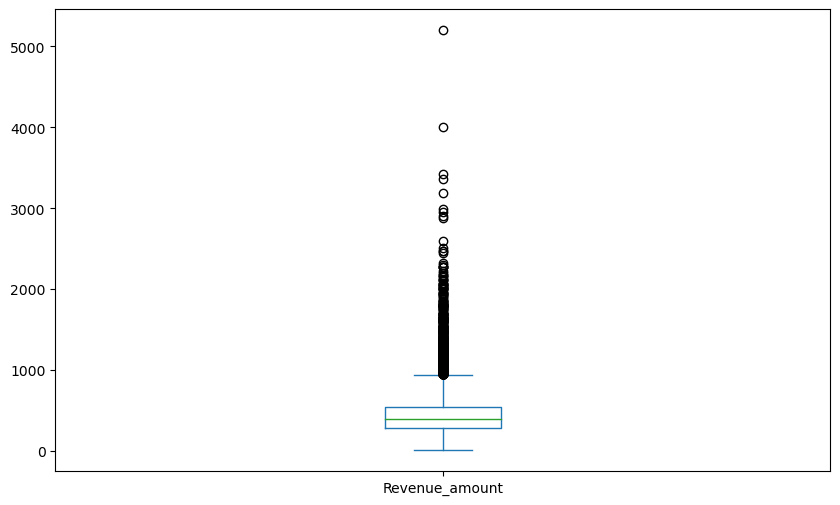

In [29]:
#Построим ящик с усами и заметим, что в верхней части есть выбросы
df['Revenue_amount'].plot(kind='box')

<AxesSubplot:>

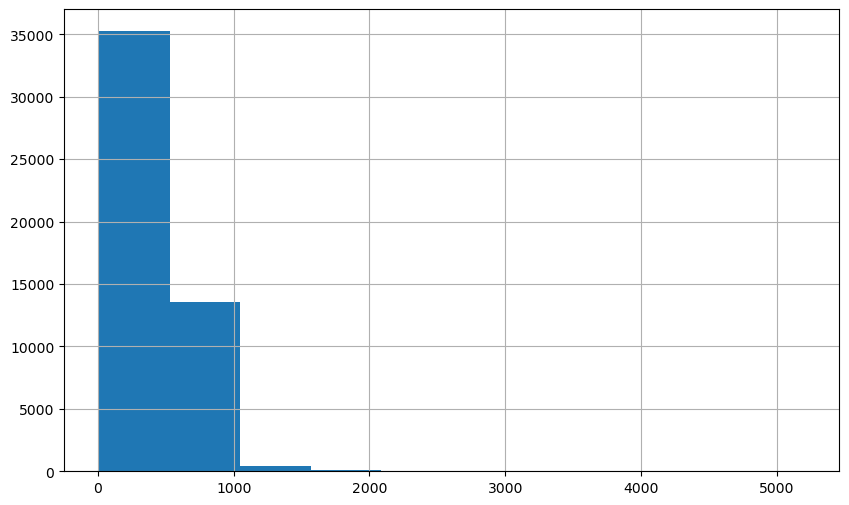

In [30]:
df['Revenue_amount'].hist()

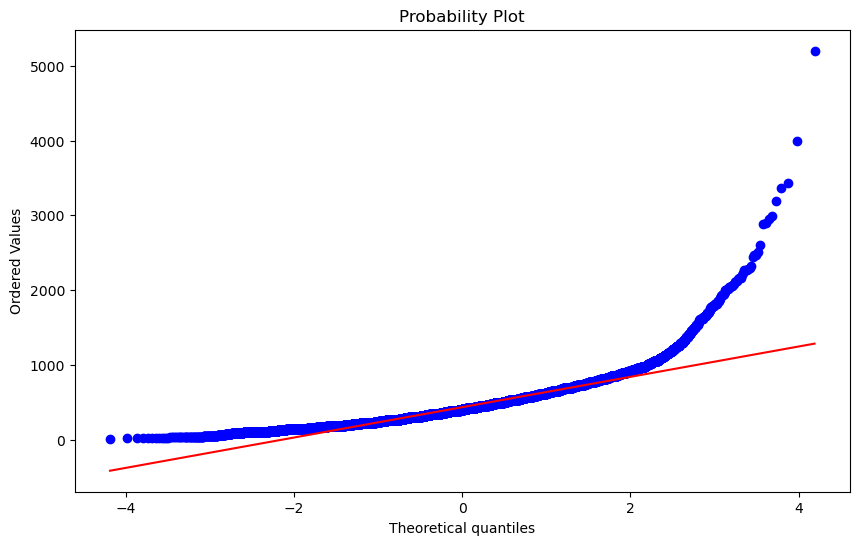

In [31]:
st.probplot(df['Revenue_amount'], dist='norm', plot=plt)
plt.show()

Распределение не является нормальным.

In [32]:
#Посчитаем количество выбросов
q75 = np.percentile(df['Revenue_amount'], 75)
q25 = np.percentile(df['Revenue_amount'], 25)
iqr = q75 - q25
ejection_h = q75 + iqr*1.5
n_ejection = df['Revenue_amount'][df['Revenue_amount'] > ejection_h].count()
print('Число выбросов равно', n_ejection)

Число выбросов равно 987


In [33]:
#Уберем очевидные выбросы
df_new = df[df['Revenue_amount'] <= ejection_h].reset_index(drop=True)
df_new

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NO FFP,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NO FFP,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NO FFP,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
48370,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,NO FFP,ONLINE
48371,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,NO FFP,OFFLINE
48372,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
48373,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,NO FFP,OFFLINE


<AxesSubplot:>

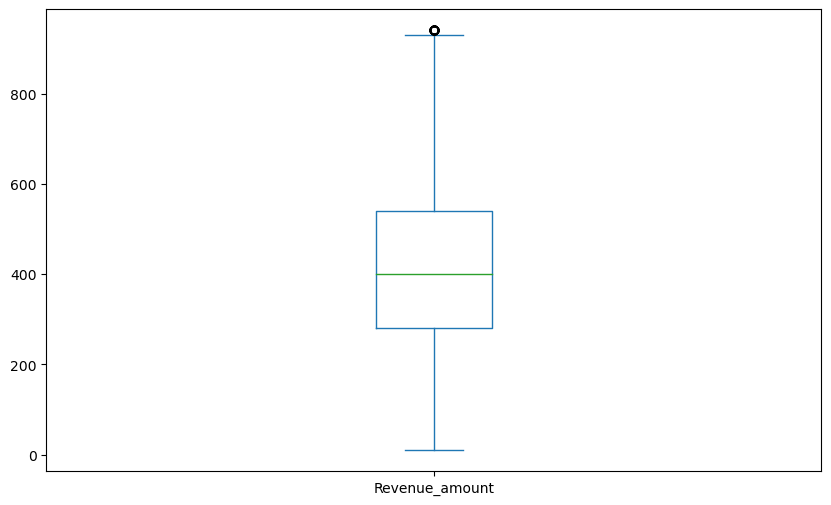

In [34]:
df_new['Revenue_amount'].plot(kind='box')

### 3.3

In [35]:
#Cоздаем словарь с сезонами и месяцами
seasons = ['1', '1', '2', '2', '2', '3', '3', '3', '4', '4', '4', '1']
month_to_season = dict(zip(range(1,13), seasons))
month_to_season 

{1: '1',
 2: '1',
 3: '2',
 4: '2',
 5: '2',
 6: '3',
 7: '3',
 8: '3',
 9: '4',
 10: '4',
 11: '4',
 12: '1'}

In [36]:
#Создаем столбец с сезоном
df_new['Season'] = df_new['Issue_date'].dt.month.map(month_to_season) 

In [37]:
df_new

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type,Season
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NO FFP,ONLINE,1
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NO FFP,OFFLINE,1
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,4
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NO FFP,ONLINE,1
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,1
...,...,...,...,...,...,...,...,...,...,...
48370,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,NO FFP,ONLINE,3
48371,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,NO FFP,OFFLINE,3
48372,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE,3
48373,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,NO FFP,OFFLINE,3


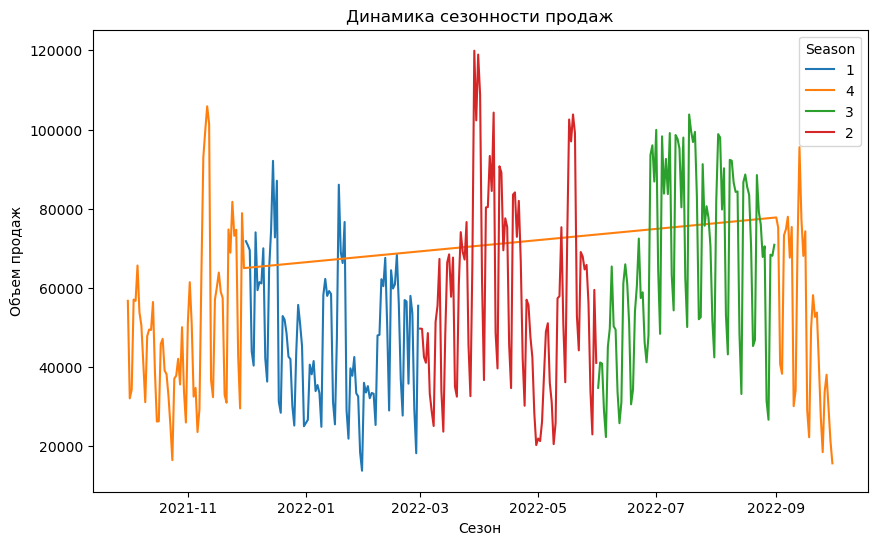

In [38]:
sns.lineplot(data=df_new, x='Issue_date', y='Revenue_amount', hue='Season', ci=None, estimator='sum').set(title='Динамика сезонности продаж', xlabel='Сезон', ylabel='Объем продаж')
plt.show()

Как можно заметить, наибольшее значение достигается весной, наименьшее зимой. Причем во всех сезонах нет стабильности, видны колебания выручки.

Нулевая гипотеза: средняя выручка от продаж зимой и осенью не отличается. Альтернативная гипотеза: средняя выручка от продаж зимой и осенью отличается

In [39]:
sample_winter = df_new[df_new['Season'] == '1']['Revenue_amount']
sample_autumn = df_new[df_new['Season'] == '4']['Revenue_amount']

In [40]:
print('Количество наблюдений в "sample_winter" равно', sample_winter.count(), 'и в "sample_autumn" равно', sample_autumn.count())

Количество наблюдений в "sample_winter" равно 11456 и в "sample_autumn" равно 12243


Чтобы проверить распределение на нормальность, используем Q-Q plot и построим графики функции плотности (тест Шапиро-Уилка применить не можем, так как количество наблюдений в выборках больше 5000)

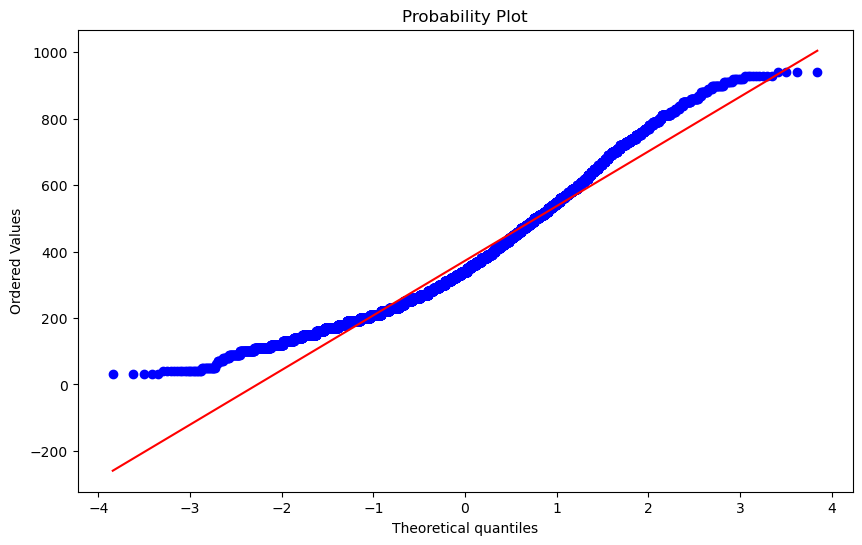

In [41]:
st.probplot(sample_winter, dist='norm', plot=plt)
plt.show()

<AxesSubplot:xlabel='Revenue_amount', ylabel='Density'>

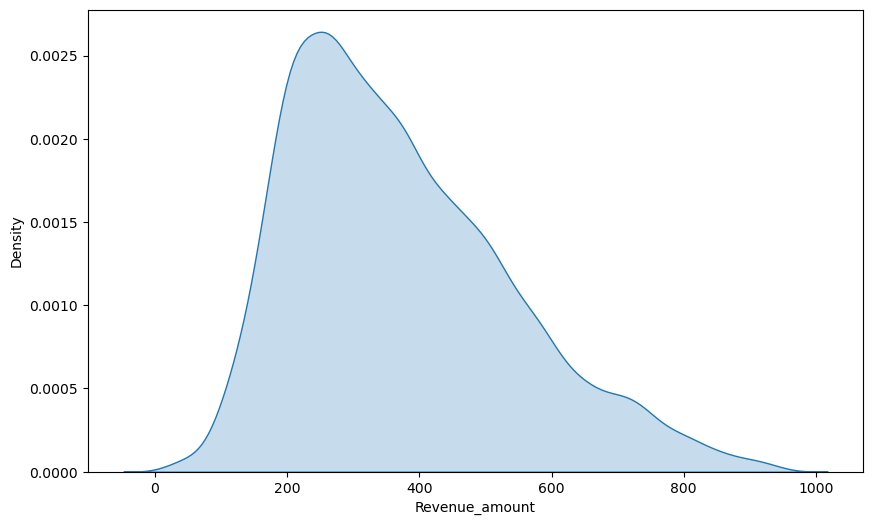

In [42]:
sns.kdeplot(sample_winter, fill=True)

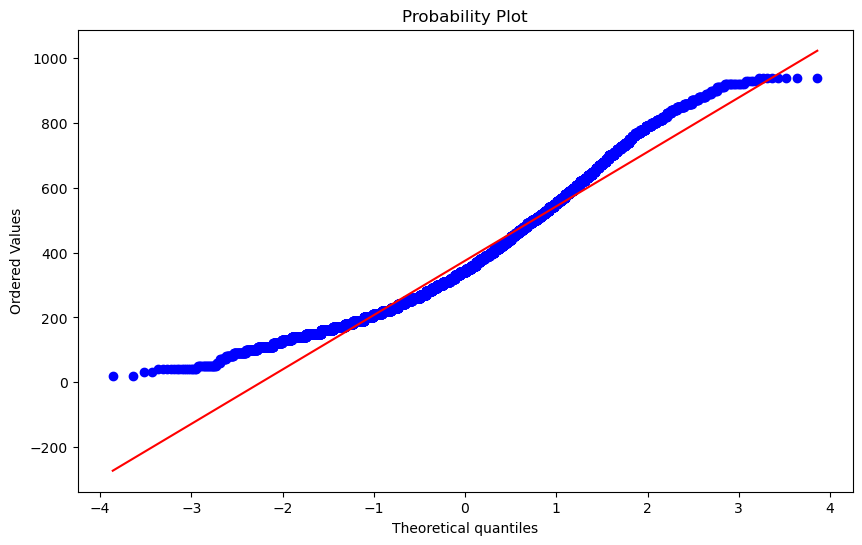

In [43]:
st.probplot(sample_autumn, dist='norm', plot=plt)
plt.show()

<AxesSubplot:xlabel='Revenue_amount', ylabel='Density'>

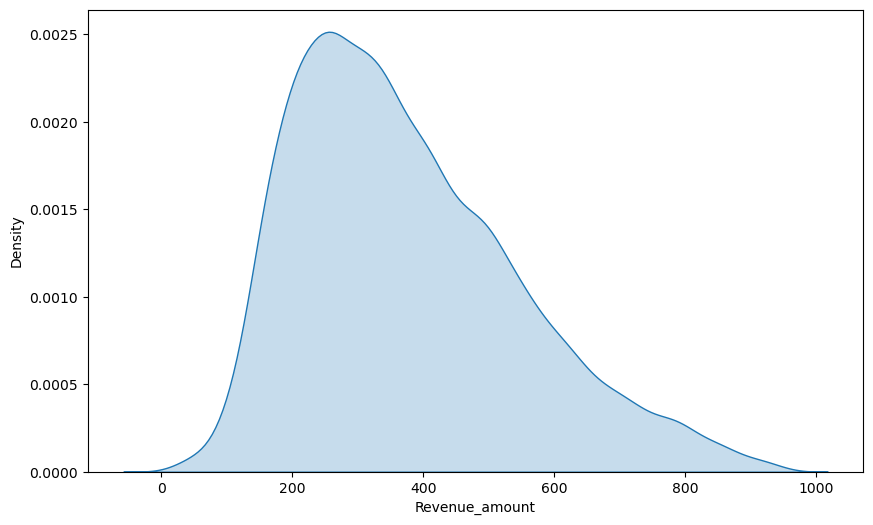

In [44]:
sns.kdeplot(sample_autumn, fill=True)

Построив Q-Q plot, мы можем увидеть, что распределение не является нормальным в обеих выборках. Значит, для проверки гипотезы нужно использовать тест Уилкоксона-Манна-Уитни.

In [45]:
alpha = 0.05
results = st.mannwhitneyu(sample_winter, sample_autumn)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value: 0.4549933504837227
Нет оснований отклонить нулевую гипотезу


Можем сделать вывод о том, что мы принимаем гипотезу о равенстве средней выручки от продаж зимой и осенью.

In [46]:
#Создаем таблицу с месяцами и сезонами
df_new['Month'] = df_new['Issue_date'].dt.month
df_new['Year'] = df_new['Issue_date'].dt.year
revenue = df_new.pivot_table(index={'Year','Month', 'Season'}, values='Revenue_amount', aggfunc={'sum', 'count'}).reset_index()
revenue

,Year,Month,Season,count,sum
0,2021,10,4,3579,1280870
1,2021,11,4,5109,1766940
2,2021,12,1,4490,1666010
3,2022,1,1,3552,1304090
4,2022,2,1,3414,1297190
5,2022,3,2,4275,1759960
6,2022,4,2,3887,1934200
7,2022,5,2,3563,1651680
8,2022,6,3,3287,1538600
9,2022,7,3,5093,2447960


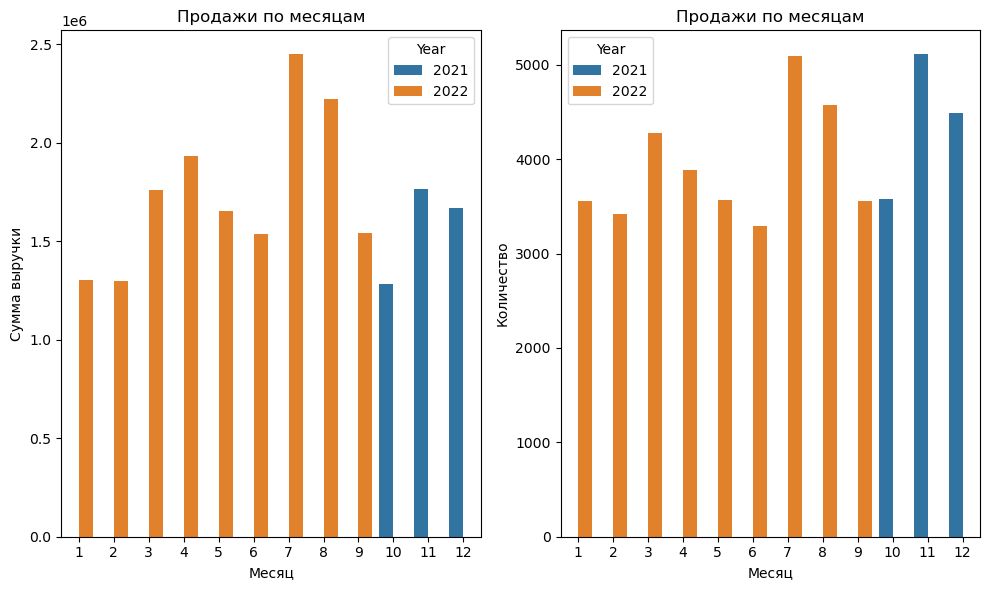

In [47]:
fid,ax = plt.subplots(1,2)
sns.barplot(data=revenue, x='Month', y='sum', hue='Year', ax=ax[0]).set(title='Продажи по месяцам', xlabel='Месяц', ylabel='Сумма выручки')
sns.barplot(data=revenue, x='Month', y='count', hue='Year', ax=ax[1]).set(title='Продажи по месяцам', xlabel='Месяц', ylabel='Количество')
plt.tight_layout()
plt.show()

Можно увидеть, что в 2022 году сумма выручки достигла максимального значения в июле и минимального в феврале, а в 2021 году максимальная выручка была в ноябре и наименьшая в октябре. На те же месяцы по максимальному значению попадает и количество продаж, а вот минимальные значения в 2021 году и в 2022 году выпали на октябрь и июнь.

In [48]:
df_new[['Revenue_amount', 'Month']].corr(method='spearman')

,Revenue_amount,Month
Revenue_amount,1.000000,-0.087665
Month,-0.087665,1.000000


Зависимость между месяцем продаж и суммой выручки слабая.

### 3.4

In [49]:
df_new[['Issue_date', 'Flight_date_loc']]

,Issue_date,Flight_date_loc
0,2021-12-07,2022-01-11
1,2021-12-31,2022-01-03
2,2021-11-28,2022-01-04
3,2021-12-08,2022-01-05
4,2021-12-08,2022-01-12
...,...,...
48370,2022-06-11,2022-06-22
48371,2022-06-06,2022-06-20
48372,2022-06-26,2022-06-29
48373,2022-06-26,2022-06-28


In [50]:
#Посчитаем количество дней
df_new['Diff_days'] = (df_new['Flight_date_loc'] - df_new['Issue_date']).dt.days
df_new['Diff_days'].unique()

array([ 35,   3,  37,  28,  46,  34,  40,  39,  49,  45,  26,  42,  48,
        38,  36,  20,   4,  24,  25,  55,  54,  41,  60,  10,  32,  47,
        53,  12,  52,  33,  22,  17,  30,   7,  31,  56,  27,  23,  15,
        43,  29,  51,  57,  63,  50,  21,   6,  19,   5,   1,  44,   2,
        18,   8,  13,   9,  16,  14,  11,   0,  74,  58, 123,  62, 118,
       297, 110, 109, 251, 291, 293, 265, 304, 264, 282, 242, 262, 268,
       243, 128, 244, 230, 235, 245, 228, 249, 229, 221, 186, 231, 248,
       208, 215, 202, 198, 222, 199, 169, 195, 216, 173, 207, 179, 196,
       220, 212, 214, 209, 200, 217, 201, 203, 226, 187, 178, 192, 177,
       204, 189, 180, 175, 190, 205, 184, 163, 181, 174,  94,  67, 191,
       172, 156, 188, 136, 183, 171, 182,  86, 134, 170, 159, 176, 194,
        68, 165, 168, 121, 105, 137, 152, 143, 154, 116, 114, 151, 139,
       157, 162, 146, 145, 153,  66, 140, 148, 149, 166, 135, 150, 147,
       141, 125, 124, 133, 126, 131, 144, 115, 138, 119, 120, 12

In [51]:
#Постотрим, какое количество дней максимальное
df_new['Diff_days'].max()

317

Опираясь на логику, хочу разделить столбец на такие группы: 
 - 1 - поздно (от 0 дней до недели)
 - 2 - средне (от недели до двух месяцев)
 - 3 - заранее (от двух месяцев до полугода)


In [52]:
#Выведем уникальные значения
list_of_days = df_new['Diff_days'].unique()
np.sort(list_of_days)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [53]:
#Зададим условие для распределения на группы
df_new.loc[(0<=df_new['Diff_days']) & (df_new['Diff_days']<=7), 'Period'] = "1"
df_new.loc[(7<df_new['Diff_days']) & (df_new['Diff_days']<=60), 'Period'] = "2"
df_new.loc[(60<df_new['Diff_days']) & (df_new['Diff_days']<=317), 'Period'] = "3"
df_new

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type,Season,Month,Year,Diff_days,Period
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12,2021,35,2
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NO FFP,OFFLINE,1,12,2021,3,1
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,4,11,2021,37,2
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NO FFP,ONLINE,1,12,2021,28,2
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,1,12,2021,35,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48370,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,NO FFP,ONLINE,3,6,2022,11,2
48371,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,NO FFP,OFFLINE,3,6,2022,14,2
48372,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE,3,6,2022,3,1
48373,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,NO FFP,OFFLINE,3,6,2022,2,1


Нулевая гипотеза: средняя выручка от продажи билетов для 1 и 3 групп клиентов совпадает. Альтернативная гипотеза: средняя выручка от продажи билетов для 1 и 3 групп клиентов не совпадает.

In [54]:
#Посчитаем количество значений в каждой группе
counts = df_new.groupby('Period')['Revenue_amount'].count()
counts

Period
1    21214
2    22956
3     4205
Name: Revenue_amount, dtype: int64

In [55]:
sample_late = df_new[df_new['Period'] == "1"]['Revenue_amount']
sample_in_advance = df_new[df_new['Period'] == "3"]['Revenue_amount']

Так как в первой группе значений больше 5000, то построим Q-Q plot, а для третьей группы тест Шапиро-Уилка, так как значений меньше 5000.

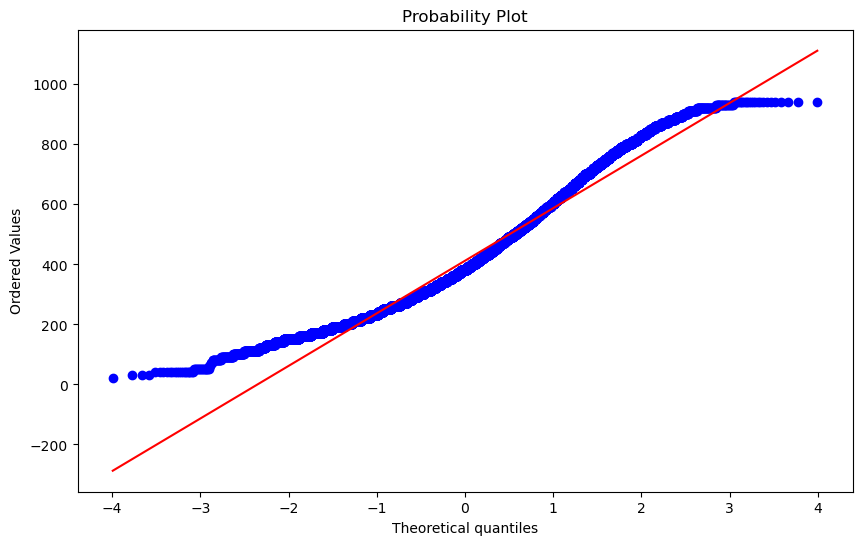

In [56]:
st.probplot(sample_late, dist='norm', plot=plt)
plt.show()

In [57]:
stat, p = st.shapiro(sample_in_advance)

alpha = 0.05
if p < alpha:
    print(p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print(p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

1.53993766184384e-15 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения


Построив Q-Q plot для первой группы, мы можем увидеть, что распределение не является нормальным. Для третьей группы применили тест Шапиро-Уилка, и распределение тоже не является нормальным. Значит, для проверки гипотезы нужно использовать тест Уилкоксона-Манна-Уитни.

In [58]:
alpha = 0.05
results = st.mannwhitneyu(sample_late, sample_in_advance)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value: 1.3922540084115459e-52
Отклоняем нулевую гипотезу


Получили, что средняя выручка для 1 и 3 групп не совпадают.

### 3.5

In [59]:
#Загружаем новый датасет
column_names = ['Airport Name', 'Location', 'Country', 'IATA_Code', 'ICAO_Code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source']
df_2 = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', names=column_names)
df_2

,Airport Name,Location,Country,IATA_Code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [60]:
df_copy = df_new.copy(deep=True)

In [61]:
df_4 = df_new.copy(deep=True)

Так как в этом пункте я упустила, что Москва пропадает, то было сделано предположение, что раз именно её упомянули, то она может попасть в топ 10. Но также я хочу посмотреть, какие еще города могли пропасть и выделить те, которые имеют наибольшее значение в рамках этого задания.

Способ 1. Исправлю ошибку, просто зная, что с Москвой что-то не так. Также был рассмотрен Новосибирск

In [62]:
#Посмотрим, какие проблемы с Москвой
df_2[df_2['Location'] == 'Moscow']

,Airport Name,Location,Country,IATA_Code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
2985,Sheremetyevo International Airport,Moscow,Russia,SVO,UUEE,55.972599,37.414600,622,3,N,Europe/Moscow,airport,OurAirports
2988,Vnukovo International Airport,Moscow,Russia,VKO,UUWW,55.591499,37.261501,685,3,N,Europe/Moscow,airport,OurAirports
4029,Domodedovo International Airport,Moscow,Russia,DME,UUDD,55.408798,37.906300,588,3,N,Europe/Moscow,airport,OurAirports
4360,Bykovo Airport,Moscow,Russia,BKA,UUBB,55.617199,38.060001,427,3,N,Europe/Moscow,airport,OurAirports
8661,Ostafyevo International Airport,Moscow,Russia,OSF,UUMO,55.511667,37.507222,568,3,N,Europe/Moscow,airport,OurAirports
11986,Myachkovo Airport,Moscow,Russia,\N,UUBM,55.560001,37.985001,410,\N,\N,\N,airport,OurAirports


In [63]:
df_2[df_2['Location'] == 'Novosibirsk']

,Airport Name,Location,Country,IATA_Code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
4078,Tolmachevo Airport,Novosibirsk,Russia,OVB,UNNT,55.012600,82.650703,365,7,N,Asia/Krasnoyarsk,airport,OurAirports
4376,Novosibirsk North Airport,Novosibirsk,Russia,\N,UNCC,55.091702,82.906700,558,7,N,Asia/Krasnoyarsk,airport,OurAirports
9054,Yeltsovka Airport,Novosibirsk,Russia,\N,UNNE,55.092400,83.004501,617,7,N,Asia/Krasnoyarsk,airport,OurAirports


In [64]:
#Заменяем значения на 'MOW'
code = {'SVO': 'MOW', 'DME': 'MOW', 'VKO': 'MOW', 'BKA': 'MOW', 'OSF': 'MOW'}
df_2['IATA_Code']= df_2['IATA_Code'].replace(code)

In [65]:
df_2[df_2['ICAO_Code'] == 'UUBM']

,Airport Name,Location,Country,IATA_Code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
11986,Myachkovo Airport,Moscow,Russia,\N,UUBM,55.560001,37.985001,410,\N,\N,\N,airport,OurAirports


In [66]:
df_2.loc[df_2['ICAO_Code'] == "UUBM", 'IATA_Code'] = 'MOW'
df_2.loc[df_2['ICAO_Code'] == 'UNCC', 'IATA_Code'] = 'OVB'
df_2.loc[df_2['ICAO_Code'] == 'UNNE', 'IATA_Code'] = 'OVB'

In [67]:
#Меняем столбец 'IATA_code' на 'Orig_city_code'
column_names = ['Airport Name', 'Location', 'Country', 'Orig_city_code', 'ICAO_Code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source']
df_2.columns = column_names

In [68]:
#Добавляем нужные столбцы в датасет
df_copy = pd.merge(df_copy, df_2[['Country','Location', 'Orig_city_code']], on='Orig_city_code', how='outer')
df_copy

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type,Season,Month,Year,Diff_days,Period,Country,Location
0,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow
1,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow
2,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow
3,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow
4,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150244,NaT,NaT,NaN,NaN,UGU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indonesia,Sugapa-Papua Island
150245,NaT,NaT,NaN,NaN,ETM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Israel,Eilat
150246,NaT,NaT,NaN,NaN,MNH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oman,Al Masna'ah
150247,NaT,NaT,NaN,NaN,CGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Philippines,Cagayan de Oro City


In [69]:
#Меняем столбец 'IATA_code' на 'Dest_city_code'
column_names = ['Airport Name', 'Location', 'Country', 'Dest_city_code', 'ICAO_Code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source']
df_2.columns = column_names

In [70]:
#Добавляем нужные столбцы в датасет
df_copy = pd.merge(df_copy, df_2[['Country','Location', 'Dest_city_code']], on='Dest_city_code', how='outer')
df_copy

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type,Season,Month,Year,Diff_days,Period,Country_x,Location_x,Country_y,Location_y
0,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow,Russia,Kaliningrad
1,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow,Russia,Kaliningrad
2,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow,Russia,Kaliningrad
3,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow,Russia,Kaliningrad
4,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow,Russia,Kaliningrad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271689,NaT,NaT,NaN,NaN,NaN,UGU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indonesia,Sugapa-Papua Island
271690,NaT,NaT,NaN,NaN,NaN,ETM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Israel,Eilat
271691,NaT,NaT,NaN,NaN,NaN,MNH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oman,Al Masna'ah
271692,NaT,NaT,NaN,NaN,NaN,CGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Philippines,Cagayan de Oro City


In [71]:
#Переименовываем столбцы
df_copy.columns = ('Issue_date', 'Flight_date_loc', 'Pax_type', 'Revenue_amount', 'Orig_city_code', 'Dest_city_code', 'Route_flight_type', 'FFP_flag', 'Sale_type', 'Season', 'Month', 'Year', 'Diff_days', 'Period', 'Country_orig', 'Location_orig', 'Country_dest', 'Location_dest')
df_copy

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type,Season,Month,Year,Diff_days,Period,Country_orig,Location_orig,Country_dest,Location_dest
0,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow,Russia,Kaliningrad
1,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow,Russia,Kaliningrad
2,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow,Russia,Kaliningrad
3,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow,Russia,Kaliningrad
4,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow,Russia,Kaliningrad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271689,NaT,NaT,NaN,NaN,NaN,UGU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indonesia,Sugapa-Papua Island
271690,NaT,NaT,NaN,NaN,NaN,ETM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Israel,Eilat
271691,NaT,NaT,NaN,NaN,NaN,MNH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oman,Al Masna'ah
271692,NaT,NaT,NaN,NaN,NaN,CGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Philippines,Cagayan de Oro City


In [72]:
# У нас есть дубликаты
df_copy.duplicated().sum()

208262

In [73]:
df_copy.loc[df_copy.duplicated(keep=False)]

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type,Season,Month,Year,Diff_days,Period,Country_orig,Location_orig,Country_dest,Location_dest
0,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow,Russia,Kaliningrad
1,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow,Russia,Kaliningrad
2,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow,Russia,Kaliningrad
3,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow,Russia,Kaliningrad
4,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,Russia,Moscow,Russia,Kaliningrad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265655,NaT,NaT,NaN,NaN,NaN,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greenland,Tasiusaq
265657,NaT,NaT,NaN,NaN,NaN,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greenland,Aappilattoq
265658,NaT,NaT,NaN,NaN,NaN,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greenland,Tasiusaq
265681,NaT,NaT,NaN,NaN,NaN,\N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belarus,Minsk


In [74]:
#Убираем дубликаты
df_copy = df_copy.drop_duplicates().reset_index(drop=True)

In [75]:
#Создаем новый столбец, где будет указан путь "город-город", а также таблицу для ВВЛ
df_copy['Way'] = df_copy['Location_orig'] + '-' + df_copy['Location_dest']
cities_1 = pd.pivot_table(data=df_copy[df_copy['Route_flight_type'] == "ВВЛ"], index='Way', values='Revenue_amount', aggfunc='count').reset_index().sort_values('Revenue_amount', ascending=False).head(10)
cities_1

,Way,Revenue_amount
250,Sochi-Moscow,1326
135,Moscow-Sochi,1292
254,St. Petersburg-Moscow,1211
136,Moscow-St. Petersburg,1190
188,Novosibirsk-Moscow,967
122,Moscow-Novosibirsk,944
50,Kazan-Moscow,759
104,Moscow-Kazan,757
140,Moscow-Ufa,708
205,Novosibirsk-Sochi,668


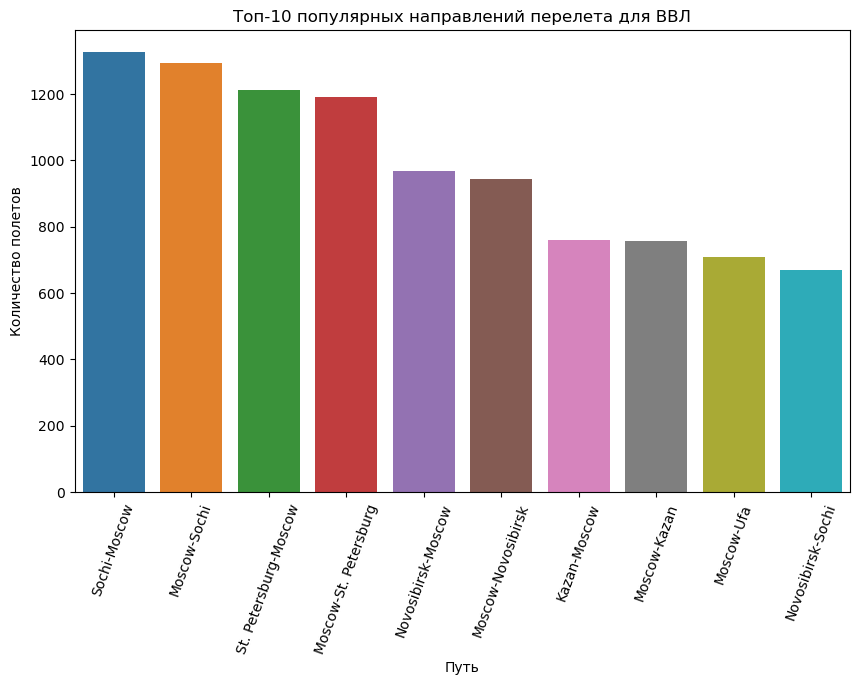

In [76]:
sns.barplot(data=cities_1, x='Way', y='Revenue_amount').set(title='Топ-10 популярных направлений перелета для ВВЛ', xlabel='Путь', ylabel='Количество полетов')
plt.xticks(rotation=70)
plt.show()

Самыми популярными направлениями перелета для ВВЛ являются из Сочи в Москву и обратно, причем Москва среди 10 самых популярных направлений является самым "популярным" городом, так как в основном из него или в него совершаются полеты.

In [77]:
#Создаем вторую таблицу, но уже для МВЛ
cities_2 = pd.pivot_table(data=df_copy[df_copy['Route_flight_type'] == "МВЛ"], index='Way', values='Revenue_amount', aggfunc='count').reset_index().sort_values('Revenue_amount', ascending=False).head(10)
cities_2

,Way,Revenue_amount
145,Moscow-Osh,151
88,Khudzhand-Moscow,144
197,Osh-Moscow,136
138,Moscow-Khudzhand,129
173,Novosibirsk-Bishkek,120
184,Novosibirsk-Osh,119
90,Khudzhand-Novosibirsk,116
199,Osh-Novosibirsk,115
17,Bishkek-Novosibirsk,102
121,Moscow-Antalya,101


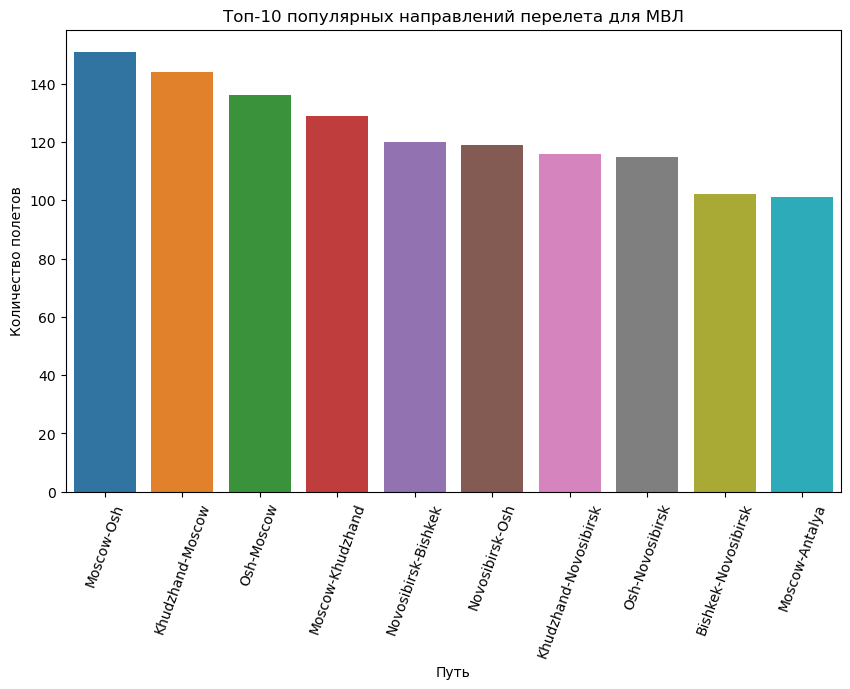

In [78]:
sns.barplot(data=cities_2, x='Way', y='Revenue_amount').set(title='Топ-10 популярных направлений перелета для МВЛ', xlabel='Путь', ylabel='Количество полетов')
plt.xticks(rotation=70)
plt.show()

Самым популярным направлением для МВЛ является из Москвы в Ош. В этом случае преобладают полеты в азиатские страны, а из русских городов представлены Москва и Новосибирск.

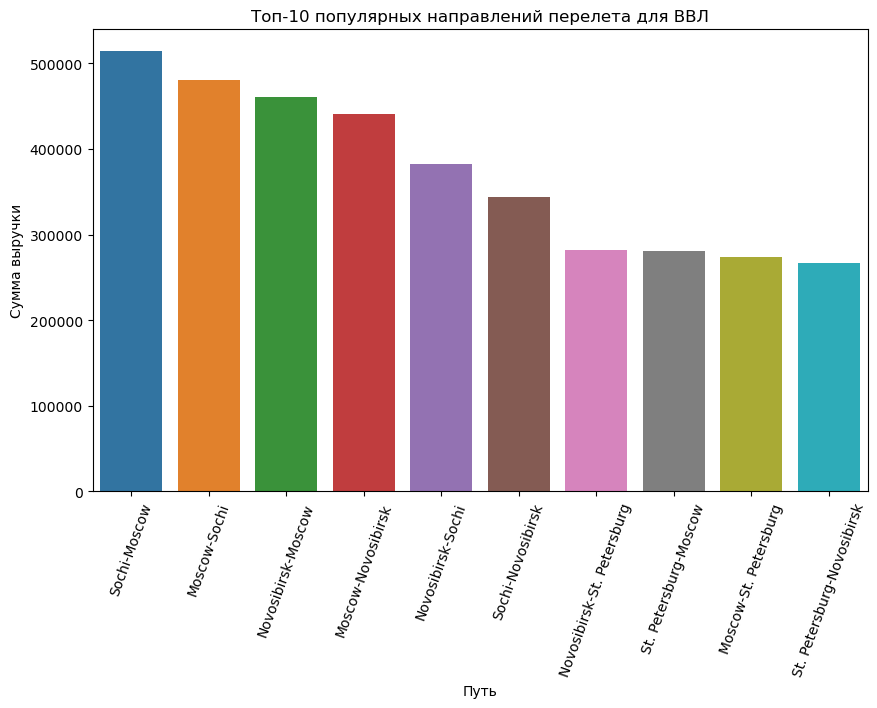

In [79]:
#Cоздадим таблицу для ВВЛ и суммы выручки
city_revenue_1 = pd.pivot_table(data=df_copy[df_copy['Route_flight_type'] == "ВВЛ"], index='Way', values='Revenue_amount', aggfunc='sum').reset_index().sort_values('Revenue_amount', ascending=False).head(10)
sns.barplot(data=city_revenue_1, x='Way', y='Revenue_amount').set(title='Топ-10 популярных направлений перелета для ВВЛ', xlabel='Путь', ylabel='Сумма выручки')
plt.xticks(rotation=70)
plt.show()

Самым прибыльным направлением для ВВЛ является Сочи-Москва, что логично, как можно предположить, потому что именно это направление является и самым популярным по числу вылетов.

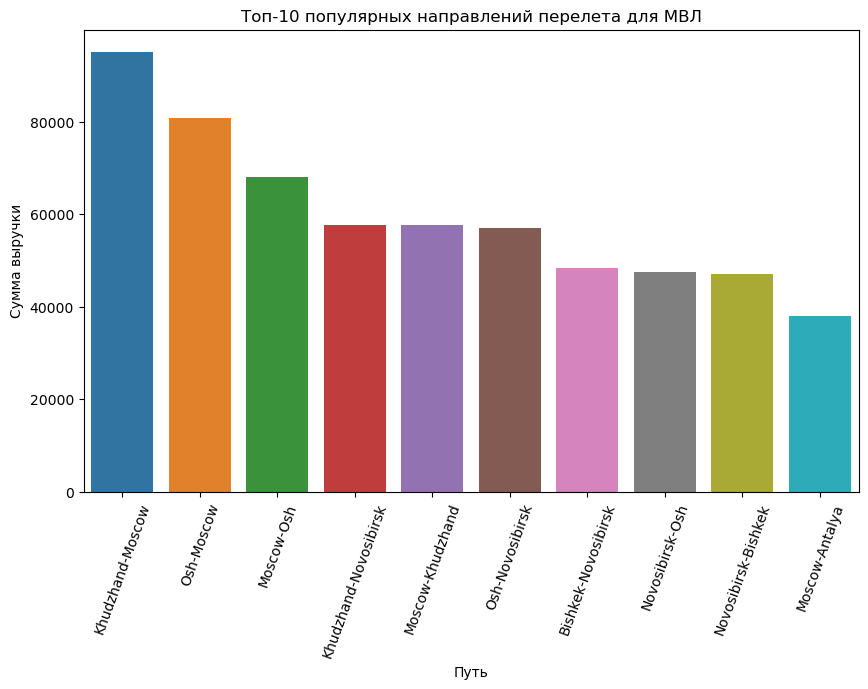

In [80]:
#Создадим таблицу для МВЛ и суммы выручки
city_revenue_2 = pd.pivot_table(data=df_copy[df_copy['Route_flight_type'] == "МВЛ"], index='Way', values='Revenue_amount', aggfunc='sum').reset_index().sort_values('Revenue_amount', ascending=False).head(10)
sns.barplot(data=city_revenue_2, x='Way', y='Revenue_amount').set(title='Топ-10 популярных направлений перелета для МВЛ', xlabel='Путь', ylabel='Сумма выручки')
plt.xticks(rotation=70)
plt.show()

Самым прибыльным направлением для МВЛ является Худжанд-Москва.

Способ 2. Предположим, что мы не знаем, что проблемы именно с Москвой, а в целом могут быть проблемы. В рамках задания надо выяснить, какие из пропущенных городов являются важными, так как они могут войти в топ.

In [81]:
column_names = ['Airport Name', 'Location', 'Country', 'IATA_Code', 'ICAO_Code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source']
df_3 = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', names=column_names)
df_3

,Airport Name,Location,Country,IATA_Code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [82]:
#Добавим в датасет df_new новые данные
column_names = ['Airport Name', 'Location', 'Country', 'Orig_city_code', 'ICAO_Code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source']
df_3.columns = column_names

In [83]:
df_new = pd.merge(df_new, df_3[['Country','Location', 'Orig_city_code']], on='Orig_city_code', how='outer')
df_new

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type,Season,Month,Year,Diff_days,Period,Country,Location
0,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,NaN,NaN
1,2021-12-08,2022-01-12,AD,190.0,MOW,KRR,ВВЛ,FFP,OFFLINE,1,12.0,2021.0,35.0,2,NaN,NaN
2,2021-11-29,2022-01-14,AD,250.0,MOW,DUS,МВЛ,NO FFP,ONLINE,4,11.0,2021.0,46.0,2,NaN,NaN
3,2021-12-03,2022-01-06,AD,200.0,MOW,PEE,ВВЛ,FFP,ONLINE,1,12.0,2021.0,34.0,2,NaN,NaN
4,2021-11-28,2022-01-07,CHD,70.0,MOW,AER,ВВЛ,FFP,ONLINE,4,11.0,2021.0,40.0,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55937,NaT,NaT,NaN,NaN,UGU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indonesia,Sugapa-Papua Island
55938,NaT,NaT,NaN,NaN,ETM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Israel,Eilat
55939,NaT,NaT,NaN,NaN,MNH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oman,Al Masna'ah
55940,NaT,NaT,NaN,NaN,CGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Philippines,Cagayan de Oro City


In [84]:
column_names = ['Airport Name', 'Location', 'Country', 'Dest_city_code', 'ICAO_Code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source']
df_3.columns = column_names
df_new = pd.merge(df_new, df_3[['Country','Location', 'Dest_city_code']], on='Dest_city_code', how='outer')
df_new

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type,Season,Month,Year,Diff_days,Period,Country_x,Location_x,Country_y,Location_y
0,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,NaN,NaN,Russia,Kaliningrad
1,2021-12-04,2022-01-07,CHD,180.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,34.0,2,NaN,NaN,Russia,Kaliningrad
2,2021-12-14,2022-01-10,AD,120.0,MOW,KGD,ВВЛ,FFP,ONLINE,1,12.0,2021.0,27.0,2,NaN,NaN,Russia,Kaliningrad
3,2021-12-05,2022-01-05,AD,250.0,MOW,KGD,ВВЛ,FFP,ONLINE,1,12.0,2021.0,31.0,2,NaN,NaN,Russia,Kaliningrad
4,2021-10-30,2021-11-03,CHD,250.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,4,10.0,2021.0,4.0,1,NaN,NaN,Russia,Kaliningrad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63505,NaT,NaT,NaN,NaN,NaN,UGU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indonesia,Sugapa-Papua Island
63506,NaT,NaT,NaN,NaN,NaN,ETM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Israel,Eilat
63507,NaT,NaT,NaN,NaN,NaN,MNH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oman,Al Masna'ah
63508,NaT,NaT,NaN,NaN,NaN,CGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Philippines,Cagayan de Oro City


In [85]:
#Переименовываем столбцы
df_new.columns = ('Issue_date', 'Flight_date_loc', 'Pax_type', 'Revenue_amount', 'Orig_city_code', 'Dest_city_code', 'Route_flight_type', 'FFP_flag', 'Sale_type', 'Season', 'Month', 'Year', 'Diff_days', 'Period', 'Country_orig', 'Location_orig', 'Country_dest', 'Location_dest')
df_new

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type,Season,Month,Year,Diff_days,Period,Country_orig,Location_orig,Country_dest,Location_dest
0,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,NaN,NaN,Russia,Kaliningrad
1,2021-12-04,2022-01-07,CHD,180.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,34.0,2,NaN,NaN,Russia,Kaliningrad
2,2021-12-14,2022-01-10,AD,120.0,MOW,KGD,ВВЛ,FFP,ONLINE,1,12.0,2021.0,27.0,2,NaN,NaN,Russia,Kaliningrad
3,2021-12-05,2022-01-05,AD,250.0,MOW,KGD,ВВЛ,FFP,ONLINE,1,12.0,2021.0,31.0,2,NaN,NaN,Russia,Kaliningrad
4,2021-10-30,2021-11-03,CHD,250.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,4,10.0,2021.0,4.0,1,NaN,NaN,Russia,Kaliningrad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63505,NaT,NaT,NaN,NaN,NaN,UGU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indonesia,Sugapa-Papua Island
63506,NaT,NaT,NaN,NaN,NaN,ETM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Israel,Eilat
63507,NaT,NaT,NaN,NaN,NaN,MNH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oman,Al Masna'ah
63508,NaT,NaT,NaN,NaN,NaN,CGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Philippines,Cagayan de Oro City


In [86]:
#Иследуем пропущенные значения
problem = df_new[df_new['Location_orig'].isna()]
problem

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type,Season,Month,Year,Diff_days,Period,Country_orig,Location_orig,Country_dest,Location_dest
0,2021-12-07,2022-01-11,AD,200.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,35.0,2,NaN,NaN,Russia,Kaliningrad
1,2021-12-04,2022-01-07,CHD,180.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,1,12.0,2021.0,34.0,2,NaN,NaN,Russia,Kaliningrad
2,2021-12-14,2022-01-10,AD,120.0,MOW,KGD,ВВЛ,FFP,ONLINE,1,12.0,2021.0,27.0,2,NaN,NaN,Russia,Kaliningrad
3,2021-12-05,2022-01-05,AD,250.0,MOW,KGD,ВВЛ,FFP,ONLINE,1,12.0,2021.0,31.0,2,NaN,NaN,Russia,Kaliningrad
4,2021-10-30,2021-11-03,CHD,250.0,MOW,KGD,ВВЛ,NO FFP,ONLINE,4,10.0,2021.0,4.0,1,NaN,NaN,Russia,Kaliningrad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63505,NaT,NaT,NaN,NaN,NaN,UGU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indonesia,Sugapa-Papua Island
63506,NaT,NaT,NaN,NaN,NaN,ETM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Israel,Eilat
63507,NaT,NaT,NaN,NaN,NaN,MNH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oman,Al Masna'ah
63508,NaT,NaT,NaN,NaN,NaN,CGY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Philippines,Cagayan de Oro City


In [87]:
problem['Orig_city_code'].value_counts(ascending=False)
# Самое большое количество пропущенных значений по Москве

MOW    15665
GRV      137
BAK       74
NQZ       10
\N        10
MIL        9
SEL        9
TOX        8
PAR        7
BER        6
ROM        5
SIO        1
KPS        1
KRA        1
HTU        1
KGY        1
MRG        1
RPM        1
QRM        1
PPI        1
WGT        1
SNB        1
SWC        1
TYB        1
TUM        1
GUH        1
WKB        1
QRR        1
NGA        1
UUN        1
HXX        1
CWW        1
ECH        1
VLK        1
LON        1
OHH        1
TYO        1
DWD        1
KMX        1
BPH        1
MXI        1
BGN        1
RTC        1
DYA        1
ARY        1
BLN        1
BZD        1
BWQ        1
CVC        1
CYG        1
CMD        1
DRN        1
XEN        1
Name: Orig_city_code, dtype: int64

In [88]:
problem['Dest_city_code'].value_counts(ascending=False)
#Здесь по Сочи

\N     1626
AER    1292
LED    1190
OVB    1000
KZN     757
       ... 
CJC       1
CCH       1
BBA       1
ARI       1
CPO       1
Name: Dest_city_code, Length: 6057, dtype: int64

In [89]:
problem_1 = df_new[df_new['Location_dest'].isna()]
problem_1['Orig_city_code'].value_counts(ascending=False)
# Большое количество пропущенных значений по Сочи

\N     1626
AER    1326
LED    1211
OVB    1025
KZN     759
       ... 
CJC       1
CCH       1
BBA       1
ARI       1
CPO       1
Name: Orig_city_code, Length: 6057, dtype: int64

In [90]:
problem_1['Dest_city_code'].value_counts(ascending=False)
# Самое больше количество пропущенных значений по Москве

MOW    15801
GRV      111
BAK       84
NQZ       14
TOX       12
\N        10
BER        4
ROM        4
SEL        2
TYO        2
KRA        1
HTU        1
SIO        1
KPS        1
KGY        1
MRG        1
RPM        1
QRM        1
PPI        1
TUM        1
SNB        1
SWC        1
TYB        1
GUH        1
WGT        1
WKB        1
QRR        1
NGA        1
UUN        1
HXX        1
CYG        1
ECH        1
VLK        1
PAR        1
LON        1
MIL        1
DWD        1
KMX        1
BPH        1
MXI        1
BGN        1
RTC        1
DYA        1
ARY        1
BLN        1
BZD        1
BWQ        1
CVC        1
CWW        1
CMD        1
DRN        1
XEN        1
Name: Dest_city_code, dtype: int64

Больше 15 тысяч - большое количество в рамках такого датасета. Но это были лишь пропущенные значения. Мы не можем точно сказать, что города, у которых пропущенных значений не так много, в датасете не занимают приличную часть. Посмотрим в целом по датасету.

In [91]:
df_new['Orig_city_code'].value_counts(ascending=False)

MOW    15665
OVB     7995
AER     2051
LED     1942
\N      1626
       ...  
CCH        1
BBA        1
ARI        1
QPS        1
CPO        1
Name: Orig_city_code, Length: 6086, dtype: int64

In [92]:
df_new['Dest_city_code'].value_counts(ascending=False)

MOW    15801
OVB     7885
AER     2109
LED     1919
\N      1626
       ...  
CCH        1
BBA        1
ARI        1
QPS        1
CPO        1
Name: Dest_city_code, Length: 6085, dtype: int64

Таким образом, можно увидеть, что Москва действительно выделяется. Значит, что-то не так с данными. Сверим, что было в датасете df_3

In [93]:
df_3[df_3['Location'] == "Moscow"]

,Airport Name,Location,Country,Dest_city_code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
2985,Sheremetyevo International Airport,Moscow,Russia,SVO,UUEE,55.972599,37.414600,622,3,N,Europe/Moscow,airport,OurAirports
2988,Vnukovo International Airport,Moscow,Russia,VKO,UUWW,55.591499,37.261501,685,3,N,Europe/Moscow,airport,OurAirports
4029,Domodedovo International Airport,Moscow,Russia,DME,UUDD,55.408798,37.906300,588,3,N,Europe/Moscow,airport,OurAirports
4360,Bykovo Airport,Moscow,Russia,BKA,UUBB,55.617199,38.060001,427,3,N,Europe/Moscow,airport,OurAirports
8661,Ostafyevo International Airport,Moscow,Russia,OSF,UUMO,55.511667,37.507222,568,3,N,Europe/Moscow,airport,OurAirports
11986,Myachkovo Airport,Moscow,Russia,\N,UUBM,55.560001,37.985001,410,\N,\N,\N,airport,OurAirports


Теперь понятно, что не так: не совпадают коды по Москве. Все остальные действия проделаны в предыдущем способе, поэтому для дальнейшего выполнения возьмем df_copy

In [94]:
df_3[df_3['Location'] == 'Sochi']

,Airport Name,Location,Country,Dest_city_code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
2965,Sochi International Airport,Sochi,Russia,AER,URSS,43.449902,39.9566,89,3,N,Europe/Moscow,airport,OurAirports


In [95]:
df_new[df_new['Orig_city_code'] == 'AER'].isna().sum()

Issue_date              0
Flight_date_loc         0
Pax_type                0
Revenue_amount          0
Orig_city_code          0
Dest_city_code          0
Route_flight_type       0
FFP_flag                0
Sale_type               0
Season                  0
Month                   0
Year                    0
Diff_days               0
Period                  0
Country_orig            0
Location_orig           0
Country_dest         1326
Location_dest        1326
dtype: int64

In [96]:
df_new[df_new['Dest_city_code'] == 'AER'].isna().sum()

Issue_date              0
Flight_date_loc         0
Pax_type                0
Revenue_amount          0
Orig_city_code          0
Dest_city_code          0
Route_flight_type       0
FFP_flag                0
Sale_type               0
Season                  0
Month                   0
Year                    0
Diff_days               0
Period                  0
Country_orig         1292
Location_orig        1292
Country_dest            0
Location_dest           0
dtype: int64

In [97]:
df_3[df_3['Dest_city_code'] == 'LED']

,Airport Name,Location,Country,Dest_city_code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
2948,Pulkovo Airport,St. Petersburg,Russia,LED,ULLI,59.800301,30.262501,78,3,N,Europe/Moscow,airport,OurAirports


Были попытки посмотреть, почему пропуски есть, например, по Сочи и Санкт-Петербургу, но код совпадает в двух датасетах.

In [98]:
#Вот где еще есть отличия
df_3[df_3['Location'] == 'Novosibirsk']

,Airport Name,Location,Country,Dest_city_code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
4078,Tolmachevo Airport,Novosibirsk,Russia,OVB,UNNT,55.012600,82.650703,365,7,N,Asia/Krasnoyarsk,airport,OurAirports
4376,Novosibirsk North Airport,Novosibirsk,Russia,\N,UNCC,55.091702,82.906700,558,7,N,Asia/Krasnoyarsk,airport,OurAirports
9054,Yeltsovka Airport,Novosibirsk,Russia,\N,UNNE,55.092400,83.004501,617,7,N,Asia/Krasnoyarsk,airport,OurAirports


Так, наиболее важными для исследования, на мой взгляд, являются Москва и Новосибирск (Сочи и Санкт-Петербург не показали ожидаемых результатов). Другие города не были рассмотрены, так как в рамках задания они, скорее всего, не будут входить в топ.

### 3.6

In [99]:
#Применим корреляцию Спирмена
df_copy.apply(lambda x: pd.factorize(x)[0]).corr(method='spearman')

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type,Season,Month,Year,Diff_days,Period,Country_orig,Location_orig,Country_dest,Location_dest,Way
Issue_date,1.000000,0.589602,0.687792,0.550412,0.002832,0.005461,0.694189,0.584493,0.591124,0.523506,0.536325,0.570966,0.556766,0.589852,0.013536,0.004949,0.013470,0.007917,0.550331
Flight_date_loc,0.589602,1.000000,0.682741,0.541027,-0.001118,0.009295,0.689076,0.594690,0.598094,0.504760,0.489202,0.561243,0.530380,0.585639,0.009153,0.000384,0.011653,0.011780,0.553018
Pax_type,0.687792,0.682741,1.000000,0.678892,0.001704,-0.001739,0.860304,0.699371,0.719848,0.706372,0.693635,0.763528,0.701548,0.711579,0.013132,0.004257,0.013398,0.002064,0.679249
Revenue_amount,0.550412,0.541027,0.678892,1.000000,0.023852,-0.012509,0.700499,0.582575,0.622717,0.626188,0.575906,0.650455,0.562673,0.570985,0.020225,0.026306,0.007963,-0.007973,0.539372
Orig_city_code,0.002832,-0.001118,0.001704,0.023852,1.000000,-0.370047,0.012093,-0.010689,0.013373,-0.002618,0.005306,0.003226,0.005728,-0.006473,0.731468,0.982870,-0.726543,-0.364561,0.213125
Dest_city_code,0.005461,0.009295,-0.001739,-0.012509,-0.370047,1.000000,0.020028,-0.010118,0.005443,-0.016408,-0.011726,-0.016506,-0.014314,-0.001949,-0.697088,-0.368641,0.718594,0.988788,0.421076
Route_flight_type,0.694189,0.689076,0.860304,0.700499,0.012093,0.020028,1.000000,0.695077,0.753593,0.668301,0.668988,0.729763,0.672293,0.711795,0.077725,0.009569,0.077552,0.019307,0.694624
FFP_flag,0.584493,0.594690,0.699371,0.582575,-0.010689,-0.010118,0.695077,1.000000,0.508137,0.587452,0.577894,0.642832,0.592877,0.608355,-0.009281,-0.005767,-0.005739,-0.004807,0.573649
Sale_type,0.591124,0.598094,0.719848,0.622717,0.013373,0.005443,0.753593,0.508137,1.000000,0.592393,0.585529,0.648283,0.557605,0.621679,0.021194,0.014557,0.016779,0.007937,0.587803
Season,0.523506,0.504760,0.706372,0.626188,-0.002618,-0.016408,0.668301,0.587452,0.592393,1.000000,0.649791,0.798920,0.566511,0.546797,-0.007832,-0.000286,-0.004376,-0.011783,0.536985


<AxesSubplot:>

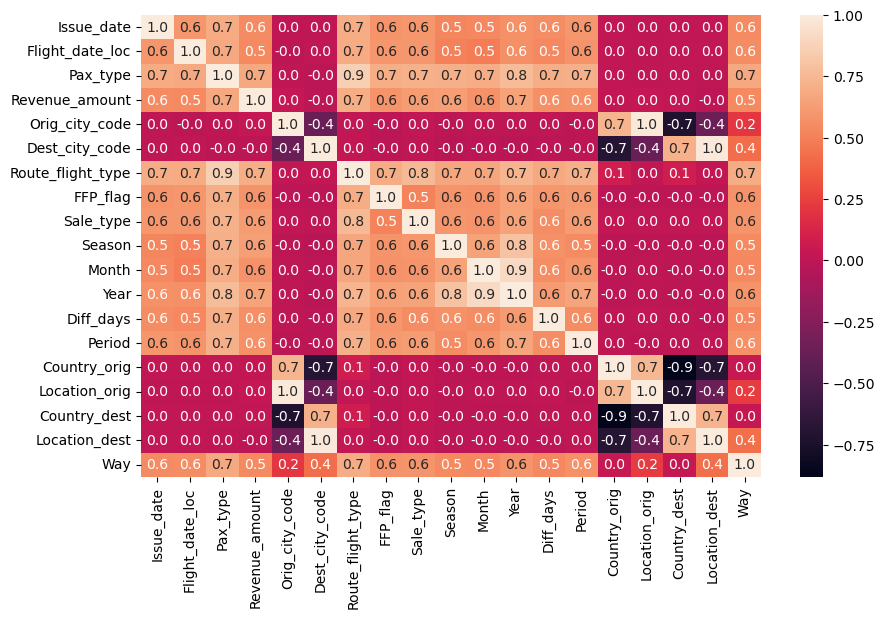

In [100]:
sns.heatmap(df_copy.apply(lambda x : pd.factorize(x)[0]).corr(method='spearman'), annot=True,fmt=".1f")

Как можно заметить, наблюдается тесная связь между выручкой и типами пассажиров, типами перелетов, способами покупки, сезоном и годом. Связь отсутствует между выручкой и странами, городами отправления и назначения.

In [101]:
#Применим корреляцию Кендалла
df_copy.apply(lambda x: pd.factorize(x)[0]).corr(method='kendall')

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type,Season,Month,Year,Diff_days,Period,Country_orig,Location_orig,Country_dest,Location_dest,Way
Issue_date,1.000000,0.422881,0.562532,0.385918,0.002628,0.005089,0.569619,0.461398,0.468634,0.386435,0.386796,0.445234,0.393747,0.461333,0.012243,0.004143,0.011764,0.006760,0.386778
Flight_date_loc,0.422881,1.000000,0.557099,0.377227,-0.001065,0.008686,0.564125,0.471967,0.475847,0.366147,0.339025,0.435071,0.369250,0.457035,0.007748,-0.000097,0.009904,0.010376,0.389299
Pax_type,0.562532,0.557099,1.000000,0.555188,0.001848,-0.001888,0.824637,0.637550,0.662976,0.621076,0.582525,0.712773,0.582529,0.644708,0.013306,0.003950,0.012999,0.001273,0.556735
Revenue_amount,0.385918,0.377227,0.555188,1.000000,0.022332,-0.011582,0.578673,0.461236,0.503388,0.486208,0.419427,0.530323,0.400810,0.443886,0.019179,0.024149,0.005911,-0.008134,0.377885
Orig_city_code,0.002628,-0.001065,0.001848,0.022332,1.000000,-0.246603,0.013173,-0.011302,0.014103,-0.002582,0.005149,0.003418,0.005376,-0.006709,0.635494,0.982515,-0.623957,-0.242468,0.237700
Dest_city_code,0.005089,0.008686,-0.001888,-0.011582,-0.246603,1.000000,0.021854,-0.010682,0.005756,-0.016390,-0.011215,-0.017534,-0.013490,-0.002024,-0.593145,-0.245989,0.621535,0.985961,0.529288
Route_flight_type,0.569619,0.564125,0.824637,0.578673,0.013173,0.021854,1.000000,0.632669,0.704200,0.577648,0.555709,0.671833,0.551124,0.645244,0.092090,0.010330,0.089724,0.020631,0.575730
FFP_flag,0.461398,0.471967,0.637550,0.461236,-0.011302,-0.010682,0.632669,1.000000,0.422008,0.495179,0.465510,0.577510,0.474371,0.532983,-0.013391,-0.006934,-0.009292,-0.006131,0.451911
Sale_type,0.468634,0.475847,0.662976,0.503388,0.014103,0.005756,0.704200,0.422008,1.000000,0.501064,0.474001,0.584413,0.437817,0.548764,0.022892,0.014911,0.016978,0.007669,0.468421
Season,0.386435,0.366147,0.621076,0.486208,-0.002582,-0.016390,0.577648,0.495179,0.501064,1.000000,0.561881,0.729358,0.429421,0.445176,-0.010601,-0.000847,-0.007156,-0.012654,0.398620


<AxesSubplot:>

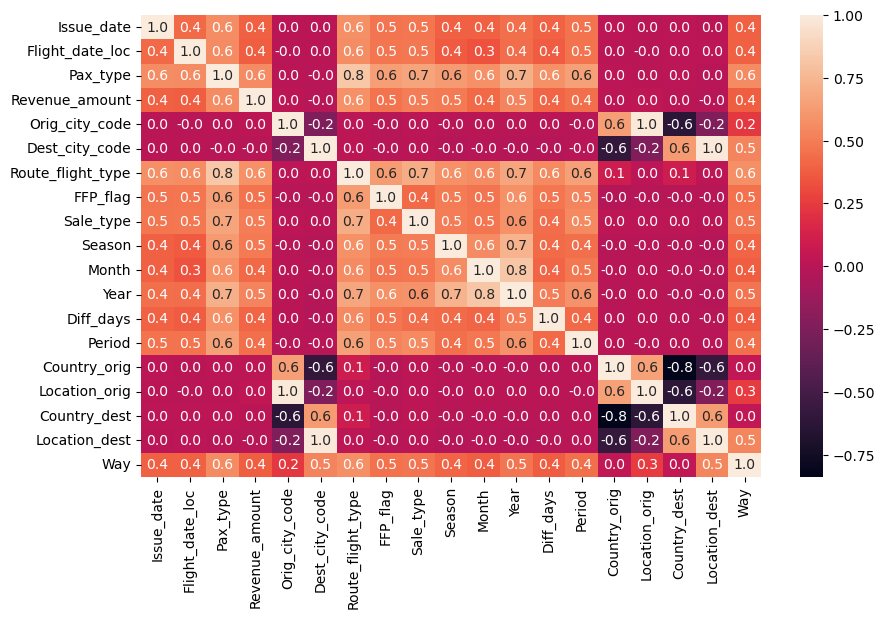

In [102]:
sns.heatmap(df_copy.apply(lambda x : pd.factorize(x)[0]).corr(method='kendall'), annot=True, fmt=".1f")

При применение корреляции Кендалла мы получили почти такой же результат.